N: 1000, 10000

Epsilon: 10, 1, 0.1

T: 10, 100, 10000


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
def plotDP(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, arrayLeaf_store, arrayTree_sortSubroot_store, arrayTree_sortD_store, xlable, ylable, title):
    xpoints = np.linspace(1, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    y4points = arrayLeaf_store
    y5points = arrayTree_sortSubroot_store
    y6points = arrayTree_sortD_store

    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="CountDP_leaf")
    plt.plot(xpoints, y2points, 'r^', label="CountDP_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="CountDP_tree_sortD")
    
    plt.plot(xpoints, y4points, 'bv', label="StoreDP_leaf")
    plt.plot(xpoints, y5points, 'rv', label="StoreDP_tree_sortSubRoot")
    plt.plot(xpoints, y6points, 'gv', label="StoreDP_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


In [3]:
def plotSort(T, arrayLeaf, arrayTree_sortSubroot, arrayTree_sortD, xlable, ylable, title):
    xpoints = np.linspace(1, T, T, endpoint=True)
    y1points = arrayLeaf
    y2points = arrayTree_sortSubroot
    y3points = arrayTree_sortD
    
    #plt.subplot(1, 1, 1)
    plt.plot(xpoints, y1points, 'b^', label="SortTime_leaf")
    plt.plot(xpoints, y2points, 'r^', label="SortTime_tree_sortSubRoot")
    plt.plot(xpoints, y3points, 'g^', label="SortTime_tree_sortD")

    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(loc="upper left", prop={'size': 8})

    plt.title(title)

    plt.show()



In [4]:
# T:10, eps:1, N:1000
# T:10, eps:1, N:1000

# T:10, eps:10, N:10000 -> runtime
# T:10, eps:1, N:10000 -> runtime

# T:100, eps:10, N:1000 
# T:100, eps:1, N:10000 

# T:10000, eps:10, N:1000 -> log variance
# T:10000, eps:1, N:1000 -> log variance

In [5]:
def readFileReturnMean(fileName):
    with open(fileName) as f:
        lines = f.readlines()
    runs = int(len(lines) / 7)
   # print(fileName)
   # print(runs)
   # for i in lines:
   #     print(i)

    metricRunTimeDP = [None]*runs
    metricRunTimeDPSort = [None]*runs
    metricRunTimeDPMerge = [None]*runs
    metricDPError = [None]*runs
    metricDPStoreError = [None]*runs
    metricTTStoreError = [None]*runs
    
    for i in range(runs):
        metricRunTimeDP_string = lines[(i*7) + 1]
        metricRunTimeDP_string_result = re.search('metricRunTimeDP: (.*)\n', metricRunTimeDP_string).group(1)
        metricRunTimeDP[i] = [int(e) for e in metricRunTimeDP_string_result.split(",")]
        
        metricRunTimeDPSort_string = lines[(i*7) + 2]
        metricRunTimeDPSort_string_result = re.search('metricRunTimeDPSort: (.*)\n', metricRunTimeDPSort_string).group(1)
        metricRunTimeDPSort[i] = [int(e) for e in metricRunTimeDPSort_string_result.split(",")]
        
        metricRunTimeDPMerge_string = lines[(i*7) + 3]
        metricRunTimeDPMerge_string_result = re.search('metricRunTimeDPMerge: (.*)\n', metricRunTimeDPMerge_string).group(1)
        metricRunTimeDPMerge[i] = [int(e) for e in metricRunTimeDPMerge_string_result.split(",")]
        
        metricDPError_string = lines[(i*7) + 4]
        metricDPError_string_result = re.search('metricDPError: (.*)\n', metricDPError_string).group(1)
        metricDPError[i] = [int(e) for e in metricDPError_string_result.split(",")]
        
        metricDPStoreError_string = lines[(i*7) + 5]
        metricDPStoreError_string_result = re.search('metricDPStoreError: (.*)\n', metricDPStoreError_string).group(1)
        metricDPStoreError[i] = [int(e) for e in metricDPStoreError_string_result.split(",")]
        
        metricTTStoreError_string = lines[(i*7) + 6]
        metricTTStoreError_string_result = re.search('metricTTStoreError: (.*)\n', metricTTStoreError_string).group(1)
        metricTTStoreError[i] = [int(e) for e in metricTTStoreError_string_result.split(",")]
        
    metricRunTimeDP_mean = np.mean(np.array(metricRunTimeDP), axis = 0)
    metricRunTimeDPSort_mean = np.mean(np.array(metricRunTimeDPSort), axis = 0)
    metricRunTimeDPMerge_mean = np.mean(np.array(metricRunTimeDPMerge), axis = 0)
    metricDPError_mean = np.mean(np.array(metricDPError), axis = 0)
    metricDPStoreError_mean = np.mean(np.array(metricDPStoreError), axis = 0)
    metricTTStoreError_mean = np.mean(np.array(metricTTStoreError), axis = 0)
    
    d = dict(); 
    d['metricRunTimeDP_mean'] = metricRunTimeDP_mean
    d['metricRunTimeDPSort_mean'] = metricRunTimeDPSort_mean
    d['metricRunTimeDPMerge_mean'] = metricRunTimeDPMerge_mean
    d['metricDPError_mean'] = metricDPError_mean
    d['metricDPStoreError_mean'] = metricDPStoreError_mean
    d['metricTTStoreError_mean'] = metricTTStoreError_mean

    return d

    '''
    print(metricRunTimeDPSort)
    print(metricDPError)
    print(metricDPStoreError)
    print(metricRunTimeDPSort_mean)
    print(metricDPError_mean)
    print(metricDPStoreError_mean)
    return metricRunTimeDPSort_mean, metricDPError_mean, metricDPStoreError_mean
    '''




In [6]:
def plotT(T, eps, N):
    # create file names
    T_string = str(T)+","
    eps_string = str(eps)+","
    N_string = str(N)
    fileNameLeaf = "leaftaxi_ss1.txt,"+T_string+eps_string+N_string+";1.txt"
    fileNameTreeSortRoot = "treetaxi_ss1.txt,"+T_string+eps_string+N_string+",0;1.txt"
    fileNameTreeSortD = "treetaxi_ss1.txt,"+T_string+eps_string+N_string+",2;1.txt"

    # read files, parse and return mean
    returnedMeanLeaf = readFileReturnMean(fileNameLeaf)
    returnedMeanSortRoot = readFileReturnMean(fileNameTreeSortRoot)
    returnedMeanSortD = readFileReturnMean(fileNameTreeSortD)

    # six metrics
        #leaf 
    LeafRunTimeDP_mean = returnedMeanLeaf["metricRunTimeDP_mean"]
    LeafRunTimeDPSort_mean = returnedMeanLeaf["metricRunTimeDPSort_mean"]
    LeafRunTimeDPMerge_mean = returnedMeanLeaf["metricRunTimeDPMerge_mean"]
    LeafDPError_mean = returnedMeanLeaf["metricDPError_mean"]
    LeafDPStoreError_mean = returnedMeanLeaf["metricDPStoreError_mean"]
    LeafTTStoreError_mean = returnedMeanLeaf["metricTTStoreError_mean"]
        #tree_sortRoot
    SortRootRunTimeDP_mean = returnedMeanSortRoot["metricRunTimeDP_mean"]
    SortRootRunTimeDPSort_mean = returnedMeanSortRoot["metricRunTimeDPSort_mean"]
    SortRootRunTimeDPMerge_mean = returnedMeanSortRoot["metricRunTimeDPMerge_mean"]
    SortRootDPError_mean = returnedMeanSortRoot["metricDPError_mean"]
    SortRootDPStoreError_mean = returnedMeanSortRoot["metricDPStoreError_mean"]
    SortRootTTStoreError_mean = returnedMeanSortRoot["metricTTStoreError_mean"]
        #tree_sortD
    SortDRunTimeDP_mean = returnedMeanSortD["metricRunTimeDP_mean"]
    SortDRunTimeDPSort_mean = returnedMeanSortD["metricRunTimeDPSort_mean"]
    SortDRunTimeDPMerge_mean = returnedMeanSortD["metricRunTimeDPMerge_mean"]
    SortDDPError_mean = returnedMeanSortD["metricDPError_mean"]
    SortDDPStoreError_mean = returnedMeanSortD["metricDPStoreError_mean"]
    SortDTTStoreError_mean = returnedMeanSortD["metricTTStoreError_mean"]

    title = "T:"+str(T)+"; eps:"+str(eps)+"; N:"+str(N)
    plotSort(T, LeafRunTimeDPSort_mean, SortRootRunTimeDPSort_mean, SortDRunTimeDPSort_mean, "time", "sortTime(s)", title)
    plotDP(T, LeafDPError_mean, SortRootDPError_mean, SortDDPError_mean, LeafDPStoreError_mean, SortRootDPStoreError_mean, SortDDPStoreError_mean, "time", "accuracy", title)

    
    
    


***************************************************************


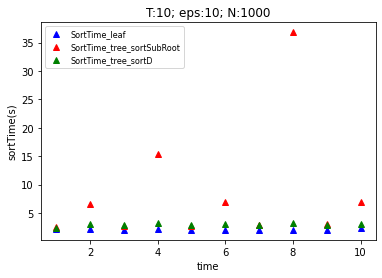

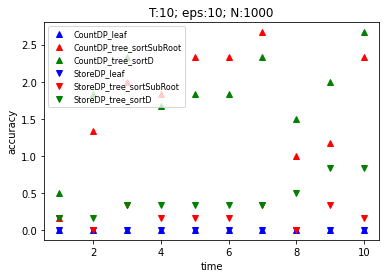

***************************************************************


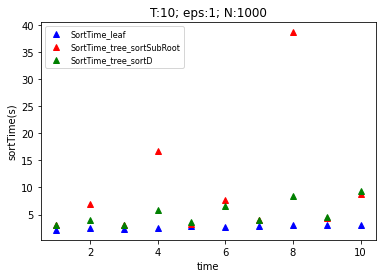

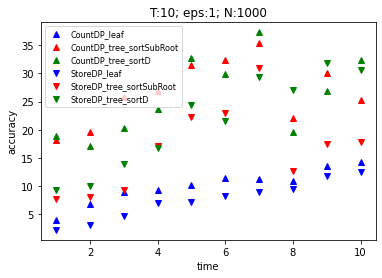

In [7]:
# varying T
T_list = [10]
eps_list = [10, 1]
N_list = [1000]

for T in T_list:
    for eps in eps_list:
        for N in N_list:
            print("***************************************************************")
            plotT(T, eps, N)


In [8]:
# create data
def plotStackBarCharRunTime(approachName, xList, xName, UpdateDPTimeTree, DPMerge, SortCacheDP):
    UpdateDPTimeTree = np.array(UpdateDPTimeTree) # milliseconds
    DPMerge = np.array(DPMerge) # microseconds
    SortCacheDP = np.array(SortCacheDP) * 1000 # s --> milliseconds
    # plot bars in stack manner
    plt.bar(xList, UpdateDPTimeTree, color='r')
    plt.bar(xList, DPMerge, bottom=UpdateDPTimeTree, color='b')
    plt.bar(xList, SortCacheDP, bottom=UpdateDPTimeTree+DPMerge, color='y')
    plt.xlabel(xName)
    plt.ylabel("Run Time")
    plt.legend(["UpdateDPTimeTree(millisec)", "DPMerge(microsec*10)", "SortCacheDP(millisec)"], loc='best', fancybox=True, framealpha=0.5)
    plt.title(approachName + ": Run Time by " + xName + " in three components")
    plt.show()
    
def plotStackBarCharAccuracy(approachName, xList, xName, DPError, DPStoreError, TTStoreError):
    DPError = np.array(DPError) 
    DPStoreError = np.array(DPStoreError)  
    TTStoreError = np.array(TTStoreError)  
    # plot bars in stack manner
    plt.bar(xList, DPError, color='r')
    plt.bar(xList, DPStoreError, bottom=DPError, color='b')
    plt.bar(xList, TTStoreError, bottom=DPError+DPStoreError, color='y')
    plt.xlabel(xName)
    plt.ylabel("Accuracy")
    plt.legend(["DPError", "DPStoreError", "TTStoreError"], loc='best', fancybox=True, framealpha=0.5)
    plt.title(approachName + ": Accuracy by " + xName + " in three metrics")
    plt.show()


#xList = ['A', 'B']
#UpdateDPTimeTree = np.array([10, 20])
#DPMerge = np.array([20, 25])
#SortCacheDP = np.array([12, 15])
#plotStackBarChar("leaaf", xList, "N", UpdateDPTimeTree, DPMerge, SortCacheDP)


In [9]:
def plotNorEps(p1, p2, p3, NorEps): #eps: T, N, epsList or N: T, eps, NList
    T = p1
    if NorEps == "eps":
        size = len(p3)
        epsList = p3
        N = p2
    else:
        size = len(p3)
        NList = p3
        eps = p2
        
    LeafRunTimeDP_list = [None]*size
    LeafRunTimeDPSort_list = [None]*size
    LeafRunTimeDPMerge_list = [None]*size
    LeafDPError_list = [None]*size
    LeafDPStoreError_list = [None]*size
    LeafTTStoreError_list = [None]*size
    
    SortRootRunTimeDP_list = [None]*size
    SortRootRunTimeDPSort_list = [None]*size
    SortRootRunTimeDPMerge_list = [None]*size
    SortRootDPError_list = [None]*size
    SortRootDPStoreError_list = [None]*size
    SortRootTTStoreError_list = [None]*size
    
    SortDRunTimeDP_list = [None]*size
    SortDRunTimeDPSort_list = [None]*size
    SortDRunTimeDPMerge_list = [None]*size
    SortDDPError_list = [None]*size
    SortDDPStoreError_list = [None]*size
    SortDTTStoreError_list = [None]*size
    # create file names
    for i in range(size):
        T_string = str(T)+","
        if NorEps == "eps":
            eps_string = str(p3[i])+","
            N_string = str(N)
        else:
            eps_string = str(eps)+","
            N_string = str(p3[i])
        
        fileNameLeaf = "leaftaxi_ss1.txt,"+T_string+eps_string+N_string+";1.txt"
        fileNameTreeSortRoot = "treetaxi_ss1.txt,"+T_string+eps_string+N_string+",0;1.txt"
        fileNameTreeSortD = "treetaxi_ss1.txt,"+T_string+eps_string+N_string+",2;1.txt"

        # read files, parse and return mean
        returnedMeanLeaf = readFileReturnMean(fileNameLeaf)
        returnedMeanSortRoot = readFileReturnMean(fileNameTreeSortRoot)
        returnedMeanSortD = readFileReturnMean(fileNameTreeSortD)

        # six metrics
            #leaf 
        LeafRunTimeDP_list[i] = sum(returnedMeanLeaf["metricRunTimeDP_mean"])
        LeafRunTimeDPSort_list[i] = sum(returnedMeanLeaf["metricRunTimeDPSort_mean"])
        LeafRunTimeDPMerge_list[i] = sum(returnedMeanLeaf["metricRunTimeDPMerge_mean"])
        LeafDPError_list[i] = sum(returnedMeanLeaf["metricDPError_mean"])
        LeafDPStoreError_list[i] = sum(returnedMeanLeaf["metricDPStoreError_mean"])
        LeafTTStoreError_list[i] = sum(returnedMeanLeaf["metricTTStoreError_mean"])
            #tree_sortRoot
        SortRootRunTimeDP_list[i] = sum(returnedMeanSortRoot["metricRunTimeDP_mean"])
        SortRootRunTimeDPSort_list[i] = sum(returnedMeanSortRoot["metricRunTimeDPSort_mean"])
        SortRootRunTimeDPMerge_list[i] = sum(returnedMeanSortRoot["metricRunTimeDPMerge_mean"])
        SortRootDPError_list[i] = sum(returnedMeanSortRoot["metricDPError_mean"])
        SortRootDPStoreError_list[i] = sum(returnedMeanSortRoot["metricDPStoreError_mean"])
        SortRootTTStoreError_list[i] = sum(returnedMeanSortRoot["metricTTStoreError_mean"])
            #tree_sortD
        SortDRunTimeDP_list[i] = sum(returnedMeanSortD["metricRunTimeDP_mean"])
        SortDRunTimeDPSort_list[i] = sum(returnedMeanSortD["metricRunTimeDPSort_mean"])
        SortDRunTimeDPMerge_list[i] = sum(returnedMeanSortD["metricRunTimeDPMerge_mean"])
        SortDDPError_list[i] = sum(returnedMeanSortD["metricDPError_mean"])
        SortDDPStoreError_list[i] = sum(returnedMeanSortD["metricDPStoreError_mean"])
        SortDTTStoreError_list[i] = sum(returnedMeanSortD["metricTTStoreError_mean"])
      #  print("SortRootRunTimeDPSort", returnedMeanSortRoot["metricRunTimeDPSort_mean"])
      #  print("SortDRunTimeDPSort_list", returnedMeanSortD["metricRunTimeDPSort_mean"])
      #  print("SortRootRunTimeDPSort", sum(returnedMeanSortRoot["metricRunTimeDPSort_mean"]))
      #  print("SortDRunTimeDPSort_list", sum(returnedMeanSortD["metricRunTimeDPSort_mean"]))


        
    xList = [str(x) for x in p3]
    # run time 
    plotStackBarCharRunTime("Leaf", xList, NorEps, LeafRunTimeDP_list, LeafRunTimeDPMerge_list, LeafRunTimeDPSort_list)
    print("LeafUpdateDPTimeTree_list(millisec)", LeafRunTimeDP_list)
    print("LeafDPMerge_list(microsec)", LeafRunTimeDPMerge_list)
    print("LeafSortCacheDP_list(sec)", LeafRunTimeDPSort_list)
    
    plotStackBarCharRunTime("TreeSortSubroot", xList, NorEps, SortRootRunTimeDP_list, SortRootRunTimeDPMerge_list, SortRootRunTimeDPSort_list)
    print("TreeSortSubrootUpdateDPTimeTree_list(millisec)", SortRootRunTimeDP_list)
    print("TreeSortSubrootDPMerge_list(microsec)", SortRootRunTimeDPMerge_list)
    print("TreeSortSubrootSortCacheDP_list(sec)", SortRootRunTimeDPSort_list)
    
    plotStackBarCharRunTime("TreeSortD", xList, NorEps, SortDRunTimeDP_list, SortDRunTimeDPMerge_list, SortDRunTimeDPSort_list)
    print("TreeSortDUpdateDPTimeTree_list(millisec)", SortDRunTimeDP_list)
    print("TreeSortDDPMerge_list(microsec)", SortDRunTimeDPMerge_list)
    print("TreeSortDSortCacheDP_list(sec)", SortDRunTimeDPSort_list)
    
    # accuracy 
    plotStackBarCharAccuracy("Leaf", xList, NorEps, LeafDPError_list, LeafDPStoreError_list, LeafTTStoreError_list)
    print("LeafDPError_list", LeafDPError_list)
    print("LeafDPStoreError_list", LeafDPStoreError_list)
    print("LeafTTStoreError_list", LeafTTStoreError_list)
    
    plotStackBarCharAccuracy("TreeSortSubroot", xList, NorEps, SortRootDPError_list, SortRootDPStoreError_list, SortRootTTStoreError_list)
    print("SortRootDPError_list", SortRootDPError_list)
    print("SortRootDPStoreError_list", SortRootDPStoreError_list)
    print("SortRootTTStoreError_list", SortRootTTStoreError_list)
    
    plotStackBarCharAccuracy("TreeSortD", xList, NorEps, SortDDPError_list, SortDDPStoreError_list, SortDTTStoreError_list)
    print("SortDDPError_list", SortDDPError_list)
    print("SortDDPStoreError_list", SortDDPStoreError_list)
    print("SortDTTStoreError_list", SortDTTStoreError_list)
    

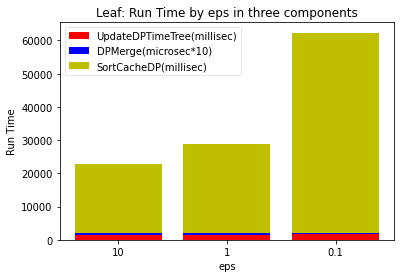

LeafUpdateDPTimeTree_list(millisec) [1505.0, 1502.1666666666665, 1754.0]
LeafDPMerge_list(microsec) [511.8333333333333, 492.49999999999994, 417.3333333333333]
LeafSortCacheDP_list(sec) [20.833333333333332, 26.833333333333332, 60.16666666666667]


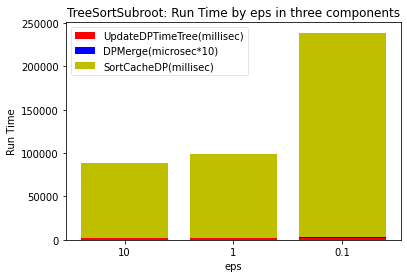

TreeSortSubrootUpdateDPTimeTree_list(millisec) [1527.8333333333335, 1655.8333333333333, 2465.8333333333335]
TreeSortSubrootDPMerge_list(microsec) [524.0, 473.3333333333333, 239.83333333333334]
TreeSortSubrootSortCacheDP_list(sec) [86.33333333333334, 96.49999999999999, 236.16666666666669]


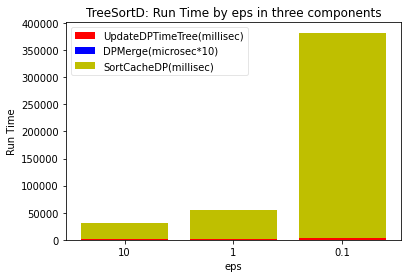

TreeSortDUpdateDPTimeTree_list(millisec) [1590.0, 1626.8333333333333, 2404.5]
TreeSortDDPMerge_list(microsec) [560.0, 513.8333333333333, 241.0]
TreeSortDSortCacheDP_list(sec) [29.0, 52.50000000000001, 379.5]


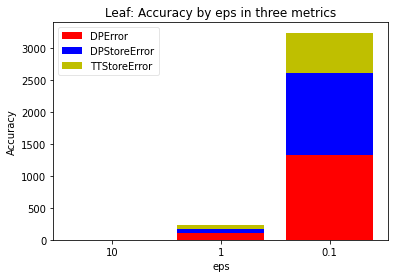

LeafDPError_list [0.0, 100.33333333333333, 1324.3333333333333]
LeafDPStoreError_list [0.0, 74.83333333333334, 1281.8333333333333]
LeafTTStoreError_list [0.0, 63.833333333333336, 638.1666666666666]


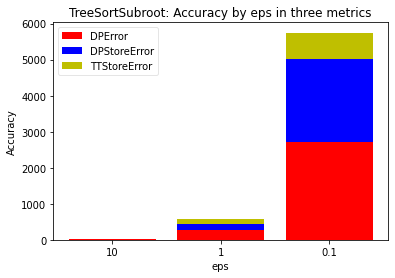

SortRootDPError_list [17.166666666666664, 267.0, 2719.166666666667]
SortRootDPStoreError_list [1.8333333333333333, 166.5, 2309.5]
SortRootTTStoreError_list [15.333333333333334, 140.5, 718.3333333333333]


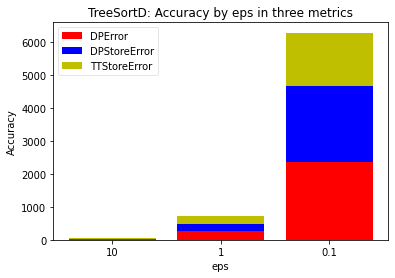

SortDDPError_list [18.5, 258.83333333333337, 2347.0]
SortDDPStoreError_list [4.166666666666667, 214.5, 2311.0]
SortDTTStoreError_list [20.0, 257.0, 1618.0]


In [10]:
# runtime and accuracy
plotNorEps(10, 1000, [10, 1, 0.1], "eps")  # T, N, epsList



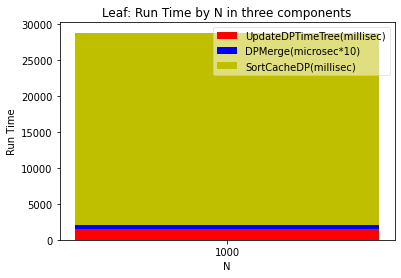

LeafUpdateDPTimeTree_list(millisec) [1502.1666666666665]
LeafDPMerge_list(microsec) [492.49999999999994]
LeafSortCacheDP_list(sec) [26.833333333333332]


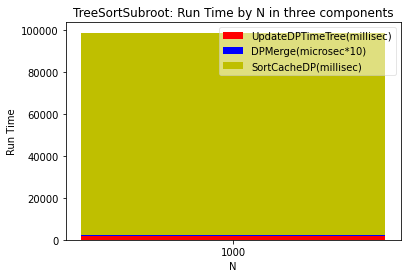

TreeSortSubrootUpdateDPTimeTree_list(millisec) [1655.8333333333333]
TreeSortSubrootDPMerge_list(microsec) [473.3333333333333]
TreeSortSubrootSortCacheDP_list(sec) [96.49999999999999]


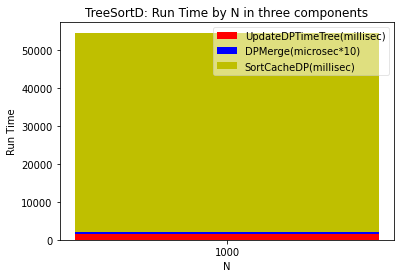

TreeSortDUpdateDPTimeTree_list(millisec) [1626.8333333333333]
TreeSortDDPMerge_list(microsec) [513.8333333333333]
TreeSortDSortCacheDP_list(sec) [52.50000000000001]


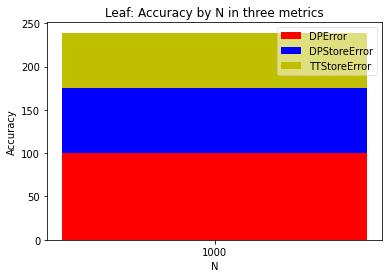

LeafDPError_list [100.33333333333333]
LeafDPStoreError_list [74.83333333333334]
LeafTTStoreError_list [63.833333333333336]


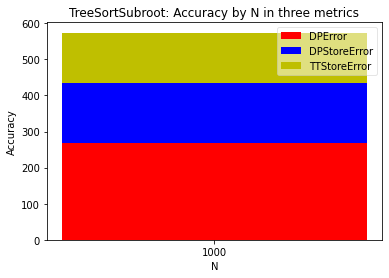

SortRootDPError_list [267.0]
SortRootDPStoreError_list [166.5]
SortRootTTStoreError_list [140.5]


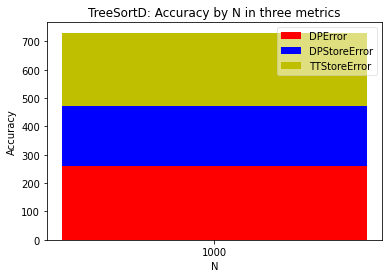

SortDDPError_list [258.83333333333337]
SortDDPStoreError_list [214.5]
SortDTTStoreError_list [257.0]


In [11]:
plotNorEps(10, 1, [1000], "N")  # T, eps, NList



In [26]:
import sys; sys.path.insert(0, '.')  
from plot_functions2 import plotT

In [13]:
print(sum([2, 6, 2, 16, 2, 7, 3, 37, 3, 7]))
print(sum([2, 3, 3, 3, 3, 3, 3, 3, 3, 3]))
print(sum([3, 7, 3, 17, 4, 8, 4, 38, 4, 9]))
print(sum([3, 4, 3, 6, 4, 7, 4, 9, 5, 9]))

85
29
97
54


In [14]:
a = [1, 2, 3]
b = [4, 5, 6]
print((sum(a) + sum(b)) / 2)
print(sum(np.mean([a, b], axis = 0)))

10.5
10.5
